In [1]:
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import pandas as pd

sns.set(font_scale = 2)

warnings.filterwarnings('ignore')
sql = pl.SQLContext()

In [2]:
df = pl.scan_csv('./result.csv')
sql.register("df", df)
df.collect()

datasetName,trainTestRatio,adjacencyMatrixThresholdValue,adjacencyMatrixLaplacianMatrix,inputLength,outputLength,modelName,modelConfig,maxEpoch,batchSize,learningRate,weightDecay,epoch,train_MAE,train_MSE,train_MAAPE,test_MAE,test_MSE,test_MAAPE,train_time,test_time,max_memory
str,f64,f64,str,i64,i64,str,str,i64,i64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,0,37.442326,2565.883331,0.514035,28.77941,1501.719751,0.508647,1.125543,0.30525,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,1,31.393465,1852.072754,0.461061,26.17366,1242.825977,0.492619,0.707178,0.249555,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,2,30.299707,1742.752523,0.453048,24.513433,1181.57146,0.463497,0.751595,0.316789,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,3,29.344819,1671.840393,0.431229,24.502646,1152.510767,0.469698,0.783001,0.28943,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,4,28.858786,1600.515269,0.435027,25.214848,1172.172144,0.481001,0.767778,0.301336,76900352
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,95,0.051512,0.008244,0.151244,0.037433,0.004348,0.124151,1.415119,0.344381,6222586368
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,96,0.051767,0.008207,0.155048,0.046807,0.005657,0.128104,1.419306,0.337443,6222586368
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,97,0.051441,0.008095,0.153658,0.038813,0.004599,0.116783,1.40301,0.328207,6222586368


In [3]:
datasetNames = sql.execute(f"SELECT DISTINCT datasetName FROM df").collect().to_series().to_list()
modelNames = sql.execute(f"SELECT DISTINCT modelName FROM df").collect().to_series().to_list()

print(datasetNames)
print(modelNames)

['Chickenpox', 'JP-Pref', 'METR-LA', 'NOAA1000', 'PEMS-BAY', 'PEMS03', 'PEMS04', 'PEMS07', 'PEMS08', 'PEMSD7', 'US-Regions', 'US-States', 'Uzel2022']
['ASTGCN', 'DCRNN', 'GWNet', 'ARMA', 'GRU', 'LSTM', 'RNN', 'VAR', 'DSTAGNN', 'DGCRN', 'STGODE', 'AGCRN']


In [4]:
modelNames = [
    'ASTGCN',
    'DCRNN',
    'GWNet',
    #'AGCRN', # not using adj mat
    'DGCRN',
    #'DSTAGNN',
    #'STGODE',
]
datasetNames = [
    'METR-LA',
    'PEMS-BAY',
    'PEMS03',
    'PEMS04',
    'PEMS07',
    #'PEMS08',
    'PEMSD7',
    'NOAA1000',
    'Uzel2022',
]

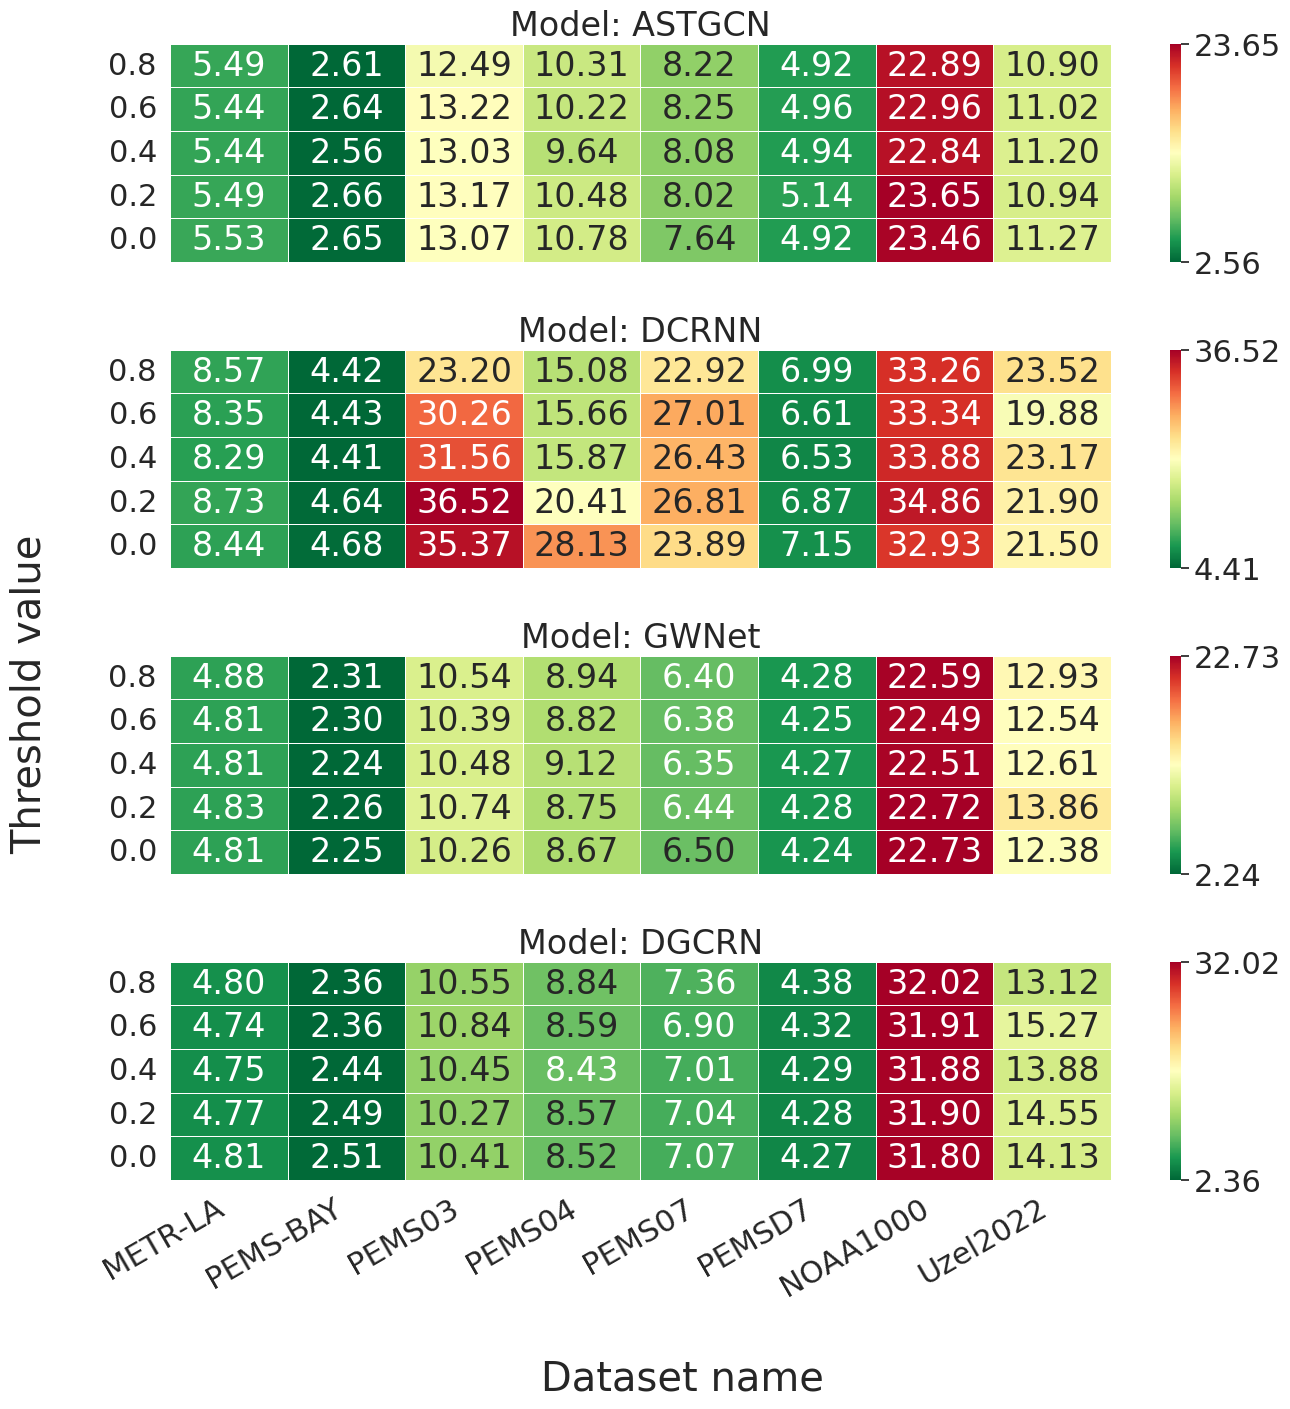

In [10]:
fig, ax = plt.subplots(len(modelNames),1, figsize=(14, 3.6*len(modelNames)))


for i, model_name in enumerate(modelNames):
    _YLABEL = 'adjacencyMatrixThresholdValue'
    _XLABEL = 'datasetName'

    # Extract data (OLAP)
    _df = sql.execute(f'''
            SELECT {_XLABEL}, {_YLABEL}, AVG(test_MAAPE) * 100.0 AS test_MAAPE
            FROM df
            WHERE
                modelName = '{model_name}'
                AND {_XLABEL} IN ({", ".join([f"'{d}'" for d in datasetNames])})
                AND (
                    (0.0 - 0.001 < {_YLABEL} AND {_YLABEL} < 0.0 + 0.001)
                    OR (0.2 - 0.001 < {_YLABEL} AND {_YLABEL} < 0.2 + 0.001)
                    OR (0.4 - 0.001 < {_YLABEL} AND {_YLABEL} < 0.4 + 0.001)
                    OR (0.6 - 0.001 < {_YLABEL} AND {_YLABEL} < 0.6 + 0.001)
                    OR (0.8 - 0.001 < {_YLABEL} AND {_YLABEL} < 0.8 + 0.001)
                )
                AND NOT epoch < 2
            GROUP BY {_XLABEL}, {_YLABEL}
        ''').collect()
    

    _df = _df.pivot(index=_YLABEL, columns=_XLABEL, values='test_MAAPE')

    # Reorder column
    _df = _df.select([_YLABEL] + datasetNames)

    # cast row value to string
    _df = _df.with_columns(pl.col(_YLABEL).cast(str))

    # Reorder row
    thresholdValues = ['0.8', '0.6', '0.4', '0.2', '0.0']
    thresholdValuesIndex = {v: i for i, v in enumerate(thresholdValues)}
    thresholdValuesNewOrder = {v: thresholdValuesIndex[v] for i, v in enumerate(_df[_YLABEL].to_list())}

    _df = _df.with_columns(
        pl.col(_YLABEL).map_elements(lambda x: thresholdValuesNewOrder[x]).alias('index'))
    _df = _df.sort('index')
    _df = _df.drop('index')

    # Convert to pandas
    vmin = _df[:, 1:].to_numpy().min()
    vmax = _df[:, 1:].to_numpy().max()

    _df = _df.to_pandas().set_index(_YLABEL)

    # draw heatmap
    cur_ax = ax[i]
    sns.heatmap(
        _df,
        ax=cur_ax,
        vmin=vmin, vmax=vmax,
        annot=True,
        fmt=".2f",
        cmap="RdYlGn_r",
        linewidths=.5,
        cbar=True,
        cbar_kws={
            "ticks": [vmin, vmax],
        })
    cur_ax.set_title(f'Model: {model_name}')
    cur_ax.set_xlabel(None)
    cur_ax.set_ylabel(None)
    cur_ax.set_yticklabels(thresholdValues, rotation=0)

    if i < len(modelNames) - 1:
        cur_ax.get_xaxis().set_visible(False)

#fig.suptitle('MAAPE loss comparison on different adjacency matrix threshold values (unit: %)')
plt.xticks(rotation=30, ha='right')

fig.supylabel('Threshold value')
fig.supxlabel('Dataset name')

fig.tight_layout()
plt.savefig("./figure/04-AdjacencyMatrixThresholdComparison.pdf", format="pdf", bbox_inches='tight')
plt.show()